
# Multilayer Perceptron using Pytorch & XOR Dataset

Dataset:

| a | b || a XOR b |
|:-:|:-:|-|:-------:|
| 0 | 0 |-|    0    |
| 0 | 1 |-|    1    |
| 1 | 0 |-|    1    |
| 1 | 1 |-|    0    |

Inputs (a, b);  Target (a XOR b)

In [4]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Create dataset
data = torch.tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
    ], dtype=torch.float32, requires_grad=True)

labels = torch.tensor([0,1,1,0], dtype=torch.float32, requires_grad=False)

** Constructing a neural network model. ** 
- Using a neural network with one hidden layer (therefore two layers of weights). 
- Using one output unit.


In [5]:
# Create first layer weights
weights_layer_0 = torch.randn([2,2], dtype=torch.float32, requires_grad=True)
bias_layer_0 = torch.randn([2], dtype=torch.float32, requires_grad=True)

# Create second layer weights
weights_layer_1 = torch.randn([2,1], dtype=torch.float32, requires_grad=True)
bias_layer_1 = torch.randn([1], dtype=torch.float32, requires_grad=True)

** Define the error function and optimizer. **
- Error function will use a standard mean squared error function. 
- Optimizer will use Adam algorithm with a learning rate of 0.01.

In [6]:
losses = []
eta = 0.01
# Define error function
def loss_ff (y,out):
    loss = (out-y).pow(2)
    return loss

# Define optimizer and its task (minimise error function)
optimizer = optim.Adam((weights_layer_0, weights_layer_1,bias_layer_0 ,bias_layer_1) , lr = eta)

** Train the network. **

- Retrieve an element from our data array, calculate a prediction on data, and compare this prediction with the expected label. 
- After calculating the loss for each prediction, update the weights of network using the optimizer.

In [7]:
epochs = 1500
for epoch in range(epochs):
    total_loss = 0
    for idx in range(4):
        # reset the optimizer
        optimizer.zero_grad()

        # get the current input data and label
        X = data[idx,:]
        X = torch.unsqueeze(X,0)
        y = labels[idx]
        
        # calculate the prediction for the current input data
        pred = torch.add(torch.mm(X, weights_layer_0), bias_layer_0)
        pred = nn.Tanh()(pred)
        pred = torch.add(torch.mm(pred, weights_layer_1), bias_layer_1)
        pred = nn.Tanh()(pred)
        
        # compare prediction with expected value and calculate the loss function
        loss = loss_ff (y,pred[0])

        # update the weights of the network
        loss.backward()
        optimizer.step()
        
        # store loss for plotting later
        total_loss += loss.item()
        
    losses.append(total_loss)

** Activate the trained model on the original dataset ** 

- Compare output with the target. Note: generally bad practice to test a model on training data, however this makes sense for this example.

In [8]:
for _x, _y in zip(data,labels):
    _x = torch.unsqueeze(_x,0)
    pred = torch.add(torch.mm(_x, weights_layer_0), bias_layer_0)
    pred = nn.Tanh()(pred)       
    pred = torch.add(torch.mm(pred, weights_layer_1), bias_layer_1)
    pred = nn.Tanh()(pred[0])
    
    print ('pred', torch.round(pred))
    print ('Pred:\t', int(torch.round(pred)))
    print ('Output:\t', int(_y))
    print ('#####')
    

pred tensor([0.], grad_fn=<RoundBackward>)
Pred:	 0
Output:	 0
#####
pred tensor([1.], grad_fn=<RoundBackward>)
Pred:	 1
Output:	 1
#####
pred tensor([1.], grad_fn=<RoundBackward>)
Pred:	 1
Output:	 1
#####
pred tensor([0.], grad_fn=<RoundBackward>)
Pred:	 0
Output:	 0
#####


** Show plot of iterative average error **

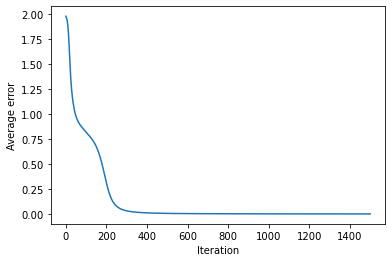

In [9]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Average error")
plt.show()